In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model


In [2]:
user_rating = pd.read_csv('../../dataset/user_rating.csv')

In [3]:
user_rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,149,2
2,1,5,5
3,1,178,3
4,1,101,4


In [4]:
user_rating.shape

(9138, 3)

In [5]:
user_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9138 entries, 0 to 9137
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        9138 non-null   int64
 1   Place_Id       9138 non-null   int64
 2   Place_Ratings  9138 non-null   int64
dtypes: int64(3)
memory usage: 214.3 KB


In [6]:
n_users = len(user_rating.User_Id.unique())
n_users

300

In [7]:
place_num = len(user_rating.Place_Id.unique())
place_num

195

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(user_rating, test_size=0.2, random_state=42)

In [9]:
train.head()

,User_Id,Place_Id,Place_Ratings
3519,117,184,4
5794,191,177,4
4081,136,85,4
5735,189,183,3
214,9,55,4


In [10]:
test.head()

,User_Id,Place_Id,Place_Ratings
2287,77,43,2
7156,235,151,1
3608,120,36,3
47,2,0,2
879,31,37,2


In [13]:
# creating destination embedding path
destination_input = Input(shape=[1])
destination_embedding = Embedding(place_num+1, 5)(destination_input)
destination_flat = Flatten()(destination_embedding)

# creating user embedding path
user_input = Input(shape=[1])
user_embedding = Embedding(n_users+1, 5)(user_input)
user_flat = Flatten()(user_embedding)

# concatenate features
conc = Concatenate()([destination_flat, user_flat])

# add fully-connected-layers
x = Dense(128, activation='relu')(conc)
x = Dense(64, activation='relu')(x)
output = Dense(1)(x)

# Create model and compile it
model = Model([user_input, destination_input], output)
model.compile('adam', 'mean_squared_error')

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding (Embedding)       (None, 1, 5)                 980       ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 1, 5)                 1505      ['input_2[0][0]']             
                                                                                              

In [15]:
history = model.fit([train.User_Id, train.Place_Id], train.Place_Ratings, epochs=20)



Epoch 1/20

229/229 [==============================] - 3s 4ms/step - loss: 3.1924
Epoch 2/20
229/229 [==============================] - 1s 3ms/step - loss: 1.8756
Epoch 3/20
229/229 [==============================] - 1s 3ms/step - loss: 1.8369
Epoch 4/20
229/229 [==============================] - 1s 3ms/step - loss: 1.8173
Epoch 5/20
229/229 [==============================] - 1s 3ms/step - loss: 1.8116
Epoch 6/20
229/229 [==============================] - 1s 3ms/step - loss: 1.8035
Epoch 7/20
229/229 [==============================] - 1s 3ms/step - loss: 1.7974
Epoch 8/20
229/229 [==============================] - 1s 3ms/step - loss: 1.7980
Epoch 9/20
229/229 [==============================] - 1s 3ms/step - loss: 1.7906
Epoch 10/20
229/229 [==============================] - 1s 4ms/step - loss: 1.7819
Epoch 11/20
229/229 [==============================] - 1s 5ms/step - loss: 1.7651
Epoch 12/20
229/229 [==============================] - 1s 3ms/step - loss: 1.7452
Epoch 13/20
229/229 [===

Text(0, 0.5, 'Training Error')

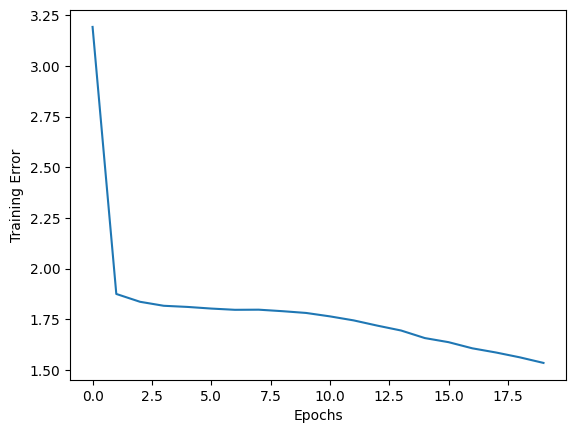

In [16]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [17]:
model.evaluate([test.User_Id, test.Place_Id], test.Place_Ratings)

58/58 [==============================] - 0s 2ms/step - loss: 2.1945


2.1945369243621826

In [16]:
# model.save('model.h5')

c:\Users\u\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
# Creating dataset for making recommendations for the first user
tourism_data = np.array(list(set(user_rating.Place_Id)))
tourism_data[:]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [22]:
id_user = 5
user = np.array([id_user for i in range(len(tourism_data))])
user[:10]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

Predict

In [ ]:
# model = tensorflow.keras.models.load_model('model.h5')


In [23]:
predictions = model.predict([user, tourism_data])

predictions = np.array([a[0] for a in predictions])

recommended_tourism_ids = (-predictions).argsort()[:10]

recommended_tourism_ids

7/7 [==============================] - 0s 2ms/step


array([ 47, 180, 112, 131, 132, 117,  22,  19, 134,  20], dtype=int64)

In [30]:
bali_dataset = pd.read_csv('../../dataset/new_bali_dataset.csv', delimiter=';')
recommended_places = bali_dataset.loc[recommended_tourism_ids, 'place']
recommended_places

47                                    Kedungu beach Bali
180                                 Tegenungan Waterfall
112                         Bali Budaya Cultural Village
131                                     Pantai Mengening
132                                   Brahmavihara Arama
117                       Taman Werdhi Budaya Art Centre
22               Monumen Operasi Lintas Laut Jawa - Bali
19                           Santhipala Spring Waterfall
134    Lapangan Puputan Badung (I Gusti Ngurah Made A...
20                          Monumen MBO DPRI Sunda Kecil
Name: place, dtype: object

In [31]:
# print predicted scores
predictions[recommended_tourism_ids]

array([4.771794 , 4.624795 , 4.5921836, 4.549923 , 4.5140734, 4.472146 ,
       4.4633036, 4.3804607, 4.3517017, 4.3312144], dtype=float32)

In [32]:

# import joblib
# joblib.dump(model, 'model.pkl')


In [33]:
# %pip install tensorflowjs

In [34]:
# # from tensorflow.keras import tensorflowjs
# # import tensorflowjs_converter

# !tensorflowjs_converter --input_format=keras_saved_model /tmp/saved_model/model.h5 /tmp/tfjs_model

In [35]:
# import tensorflow as tf
# tf.compat.v1.enable_eager_execution()

# # Load your model
# model = tf.keras.models.load_model('model.h5')

# # Save the model in TensorFlow.js format
# import tensorflowjs as tfjs
# tfjs.converters.save_keras_model(model, '/tfjs_model')

In [36]:
# import tensorflowjs as tfjs

# model = tfjs.converters.load_keras_model('/content/model.json')

In [37]:
# import tensorflow as tf
# import numpy as np

# # 1. Load the original model
# model = tf.keras.models.load_model('/tmp/saved_model/model.h5')
# id_user = 3
# tourism_data = np.array(list(set(tourism.Place_Id)))
# user = np.array([id_user for i in range(len(tourism_data))])
# predictions = model.predict([user, tourism_data])
# print(predictions)


In [38]:
# shape = len(predictions)
# print(shape)
# print(57-39)
# print(len(tourism_data))

In [ ]:
# shape = len(predictions)
# print(shape)
# print(57-39)
# print(len(tourism_data))